In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
from tqdm import tqdm
%matplotlib inline

In [2]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [3]:
root = r"C:/Users/sree-LM/Documents/crowd counting/ShanghaiTech/"

In [4]:
#now generate the ShanghaiA's ground truth
part_A_train = root + 'part_A_final/train_data/images'
#part_A_train = os.path.join(root,'part_A_final/train_data','images')
print(part_A_train)
#part_A_test = os.path.join(root,'abspart_A_final/test_data','images')
part_A_test = root + 'part_A_final/test_data/images'
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_test]

C:/Users/sree-LM/Documents/crowd counting/ShanghaiTech/part_A_final/train_data/images


In [5]:
img_paths = []
for path in path_sets:
    print(path)
    img_list = glob.glob('../ShanghaiTech/part_A/test_data/images/*.jpg')
    for i in img_list:
        img_paths.append(i)

C:/Users/sree-LM/Documents/crowd counting/ShanghaiTech/part_A_final/test_data/images


In [6]:
model = CSRNet()

In [7]:
model = model.cuda()

In [8]:
checkpoint = torch.load('0model_best.pth.tar')

In [9]:
model.load_state_dict(checkpoint['state_dict'])

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [10]:
mae = 0
for i in tqdm(range(len(img_paths))):
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground-truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
print (mae/len(img_paths))

100%|████████████████████████████████████████████████████████████████████████████████| 182/182 [06:19<00:00,  1.35s/it]


75.69745107797476


Predicted Count :  1233


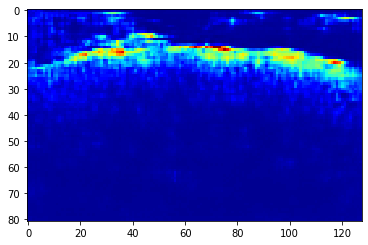

Original Count :  1115


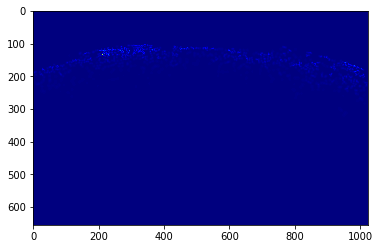

Original Image


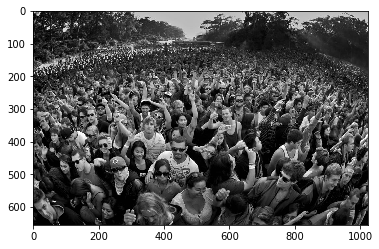

In [11]:
from matplotlib import cm as c
img = transform(Image.open('../ShanghaiTech/part_A/test_data/images/IMG_63.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('../ShanghaiTech/part_A/test_data/ground-truth/IMG_63.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('../ShanghaiTech/part_A/test_data/images/IMG_63.jpg'))
plt.show()